In [1]:
#import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data into Dataframes
store_df = pd.read_csv("Resources/store.csv")
train_df = pd.read_csv("Resources/train.csv")

C:\Users\rafed.mahbub\AppData\Local\Temp\ipykernel_28200\1403604502.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Resources/train.csv")


In [3]:
#show the first 5 rows of the store dataframe
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
#show the first 5 rows of the train dataframe
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#Look at the shape of each dataframe
store_df.shape, train_df.shape

((1115, 10), (1017209, 9))

In [6]:
#See the summary statistics
# observations - there are 1115 stores. The competition distance has a wide range, with the min 20 and the maximum being 75860.

store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
#See the summary statisticsfor the train_df
# observations - the dataset contains over 1 million records. Sales range between 0 - 41,551. 
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Look at the information of the store dataframe
# observations - 3 categorical variables (StoreType, Assortment, PromoInterval)
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#Look at the information of the train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#Convert date column  in the train_df to datetime.
train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [11]:
# identifying missing values in the store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
# identifying missing values in the train dataframe
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What strategy will i utilise to handle missing values in the store_df?
- For competitonDistance, i will visualise the distribution to identify whether the mean or median would be better for filling the missing 3 data points. 

- For competitionopensincemonth and competitionopensinceyear columns, I will create a binary column that the competition one month and year is missing in the dataset.

- For the promo2 since week/year, I have read the dataset documentation and identified that missing values means that the stores did not participate in promo2. so, i will fill those datapoint with corresponding 0 from the promo2 column.

- For promoInterval, since it is a categorical column, i will fill it with 'No promo2'

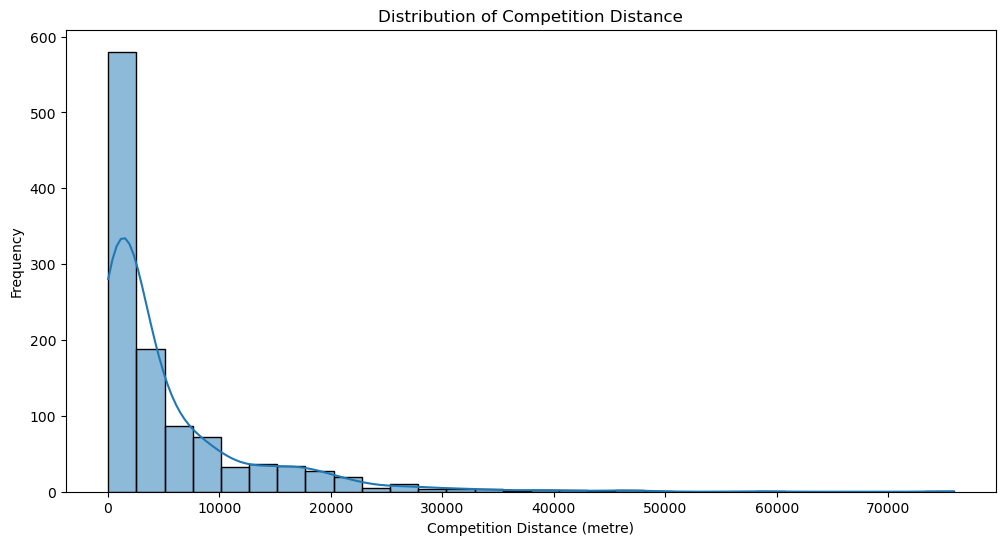

In [13]:
#First, visualise the competition distance to decide whether the 
#mean or median would be best to handle the missing value since it's just 3

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of 'CompetitionDistance'
plt.figure(figsize=(12, 6))
sns.histplot(store_df['CompetitionDistance'], bins=30, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance (metre)')
plt.ylabel('Frequency')
plt.show()


In [14]:
#For competition distance, fill missing values with the median values since it is right skewed

competition_distance_median = store_df['CompetitionDistance'].median()

store_df['CompetitionDistance'].fillna(competition_distance_median, inplace=True)

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
# Create a binary column 'CompetitionOpenSinceMonth_Missing' indicating whether the competition open date is missing

store_df['CompetitionOpenSinceMonth_Missing'] = store_df['CompetitionOpenSinceMonth'].isnull().astype(int)

store_df['CompetitionOpenSinceYear_Missing'] = store_df['CompetitionOpenSinceYear'].isnull().astype(int)

store_df.isnull().sum()

Store                                  0
StoreType                              0
Assortment                             0
CompetitionDistance                    0
CompetitionOpenSinceMonth            354
CompetitionOpenSinceYear             354
Promo2                                 0
Promo2SinceWeek                      544
Promo2SinceYear                      544
PromoInterval                        544
CompetitionOpenSinceMonth_Missing      0
CompetitionOpenSinceYear_Missing       0
dtype: int64

In [16]:
# Fill missing values in 'Promo2SinceWeek' and 'Promo2SinceYear' with 0 
# indicating that those stores did not take part in promo2 sales.
#They are filled with 0 because they are numerical datatype.
# Fill missing values in 'PromoInterval' with "No Promo2".
# This column is filled with string because it is categorical column.

store_df['Promo2SinceWeek'].fillna(0, inplace=True)

store_df['Promo2SinceYear'].fillna(0, inplace=True)

store_df['PromoInterval'].fillna("No Promo2", inplace=True)

store_df.isnull().sum()

Store                                  0
StoreType                              0
Assortment                             0
CompetitionDistance                    0
CompetitionOpenSinceMonth            354
CompetitionOpenSinceYear             354
Promo2                                 0
Promo2SinceWeek                        0
Promo2SinceYear                        0
PromoInterval                          0
CompetitionOpenSinceMonth_Missing      0
CompetitionOpenSinceYear_Missing       0
dtype: int64

In [17]:
# Merge the train_df and store_df datasets on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

# Display the initial few rows of the merged dataset
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth_Missing,CompetitionOpenSinceYear_Missing
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,No Promo2,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,No Promo2,0,0


In [18]:
#see the list of columns in the merged_df

merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth_Missing',
       'CompetitionOpenSinceYear_Missing'],
      dtype='object')

In [19]:
#see the number of columns in the merged_df

print(len(merged_df.columns))

20


In [20]:
#save the merged_df

merged_df.to_csv('Resources/cleaned_merged_df.csv', index=False)